# **Project Name: Online Retail Customer Segmentation**

**BUSINESS CONTEXT:**

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Problem statement:**

We need to sort the customers into major segments to help owner take necessary measures to retain and increase customer base. This help increase company turnover and hence profits.

# **Dataset Description:**

**Invoice no** : Invoice number

**Stock Code** : Stock name code

**Description** : Description of product

**Quantity** : Quantity bought

**InvoiceDate** : Invoice date

**UnitPrice** : Price per unit

**CustomerID** : Unique customer id

**Country** : Location

# **Github Link:**

https://github.com/ganeshhegde48/Unsupervised-ML-python-project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Online Retail.xlsx')

# Data Insights

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.shape

(541909, 8)

# **Data Cleaning**

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
#checking missing values
def mis_val(d):
    l=[]
    for x in d.isnull().sum().index:
        g=[]
        g.append(x)
        g.append(d[x].isnull().sum())
        per=(d[x].isnull().sum()/len(d))*100
        g.append(per)
        l.append(g)
    misd=pd.DataFrame(l)
    misd.columns=['Column','Missing Value','Percentage of Missing Value']
    misd.sort_values(by='Percentage of Missing Value',ascending=False,inplace=True)
    return misd

In [11]:
mis_val(df)

,Column,Missing Value,Percentage of Missing Value
6,CustomerID,135080,24.926694
2,Description,1454,0.268311
0,InvoiceNo,0,0.000000
1,StockCode,0,0.000000
3,Quantity,0,0.000000
4,InvoiceDate,0,0.000000
5,UnitPrice,0,0.000000
7,Country,0,0.000000


In [12]:
df1 = df.copy()

In [13]:
# dropping columns
df1.dropna(subset=['CustomerID'],axis=0,inplace=True)

In [14]:
mis_val(df1)

,Column,Missing Value,Percentage of Missing Value
0,InvoiceNo,0,0.0
1,StockCode,0,0.0
2,Description,0,0.0
3,Quantity,0,0.0
4,InvoiceDate,0,0.0
5,UnitPrice,0,0.0
6,CustomerID,0,0.0
7,Country,0,0.0


In [15]:
# finding duplicates
df1.duplicated().sum()

5225

In [16]:
df1[df1.duplicated()==True].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [17]:
df1.drop_duplicates(inplace=True)

In [18]:
df1.duplicated().sum()

0

# Exploratory Data Analysis

In [19]:
df1.Country.value_counts()

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


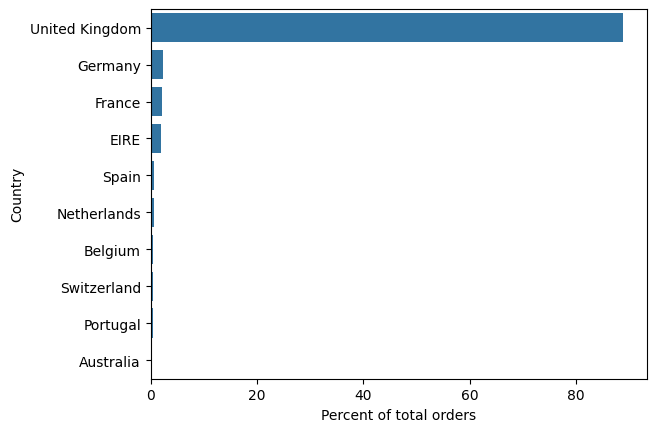

In [20]:
# Finding top 10 countries on total order percentage
plt_countries=df1.Country.value_counts()[0:10]/len(df1)*100
plt_countries=pd.DataFrame(plt_countries)
plt_countries.columns=['Percent of total orders']
plt_countries
sns.barplot(data=plt_countries,y=plt_countries.index,x=plt_countries['Percent of total orders']);

United Kingdom, Germany , France countries place most number of orders

<Axes: title={'center': 'Top 5 Product Name'}, xlabel='count', ylabel='Description'>

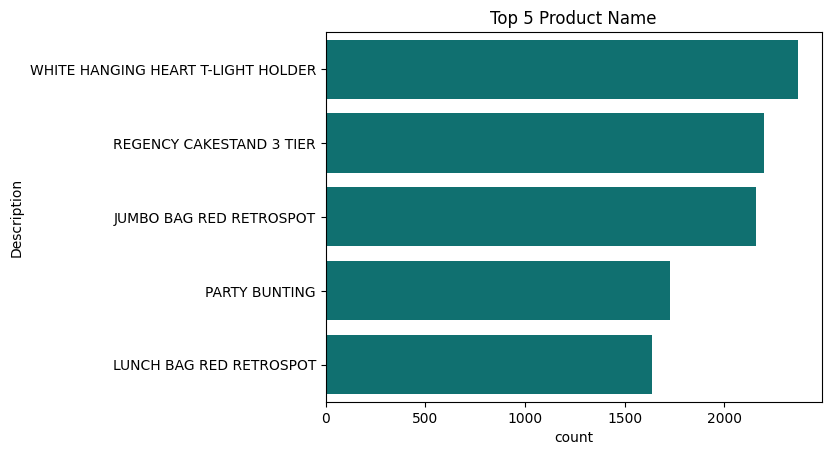

In [21]:
# finding top selling products
df_des=df['Description'].value_counts().reset_index()
df_des.rename(columns={'index': 'Description_Name'}, inplace=True)
plt.title('Top 5 Product Name')
sns.barplot(x='count',y='Description',data=df_des[:5], color='teal')

These 5 products have highest demand, we should keep them in stock.

<Axes: title={'center': 'Bottom 5 Product Name'}, xlabel='count', ylabel='Description'>

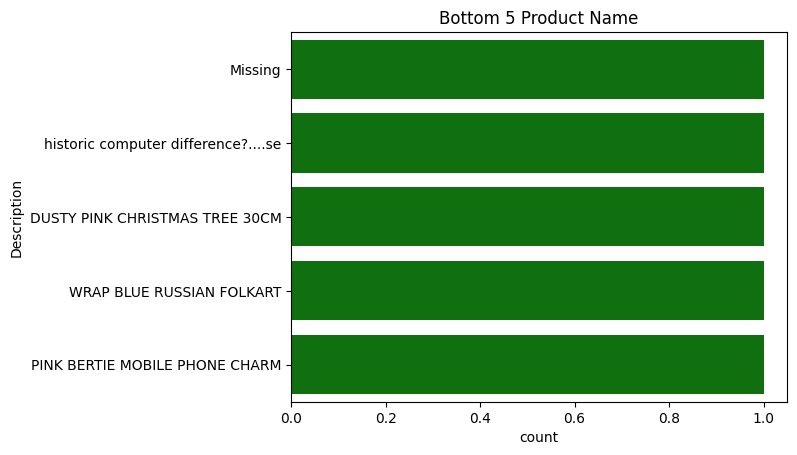

In [22]:
df_des=df['Description'].value_counts().reset_index()
df_des.rename(columns={'index': 'Description_Name'}, inplace=True)
plt.title('Bottom 5 Product Name')
sns.barplot(x='count',y='Description',data=df_des[-5:], color='green')

As we can see that these 5 products sell in very quantity we should either market these products to increase the sales or stop selling these products

**Analysis**

In [23]:
df3=df1.copy()
df3.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [24]:
df3.reset_index(inplace=True)
df3.drop('index',axis='columns',inplace=True)
df3.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [25]:
# this takes datetime as input and returns year and month
def for_start(y):
    y1=y.month
    y2=y.year
    y3=dt.date(y2,y1,1)
    return y3

In [26]:
df3['InvoiceFormat']=df3['InvoiceDate'].apply(for_start)
df3.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceFormat
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01


In [27]:
#transaction month of each customer
df3['Cohort Month']=df3.groupby('CustomerID')['InvoiceFormat'].transform(min)
df3.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceFormat,Cohort Month
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01


In [28]:
# this helps calculate the difference between invoice format and month
def diff(d,x1,y1):
    l=[]
    for i in range(0,len(d)):
        xyear=d[x1][i].year
        xmonth=d[x1][i].month
        yyear=d[y1][i].year
        ymonth=d[y1][i].month
        diff=((xyear-yyear)*12)+(xmonth-ymonth)+1
        l.append(diff)
    return l

In [29]:
df3['Cohort Index']=diff(df3,'InvoiceFormat','Cohort Month')

In [30]:
df3.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceFormat,Cohort Month,Cohort Index
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


In [31]:
df4=df3[['CustomerID','Cohort Month','Cohort Index']]
df4.head(3)

,CustomerID,Cohort Month,Cohort Index
0,17850.0,2010-12-01,1
1,17850.0,2010-12-01,1
2,17850.0,2010-12-01,1


In [32]:
df5=df4.groupby(['Cohort Month','Cohort Index'])['CustomerID'].apply(pd.Series.nunique).reset_index()
df5.head()

,Cohort Month,Cohort Index,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341


<Axes: title={'center': 'Monthwise distribution'}, xlabel='count', ylabel='Month'>

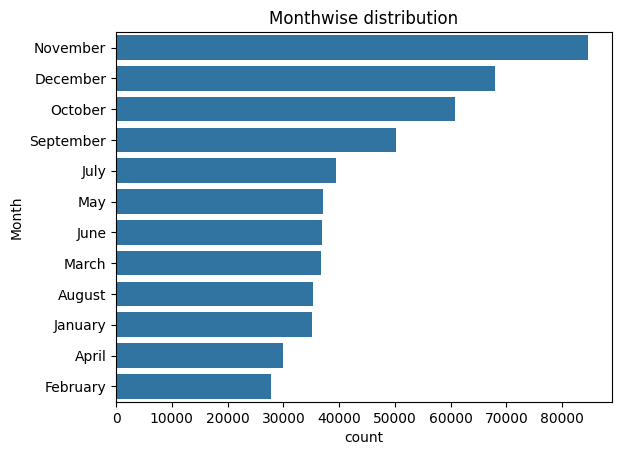

In [54]:
df['Month']=df['InvoiceDate'].dt.month_name()
df7=df['Month'].value_counts().reset_index()
df7.columns=['Month','count']
plt.title('Monthwise distribution')
sns.barplot(x='count',y='Month',data=df7)

<Axes: title={'center': 'Hourwise distribution'}, xlabel='hour', ylabel='count'>

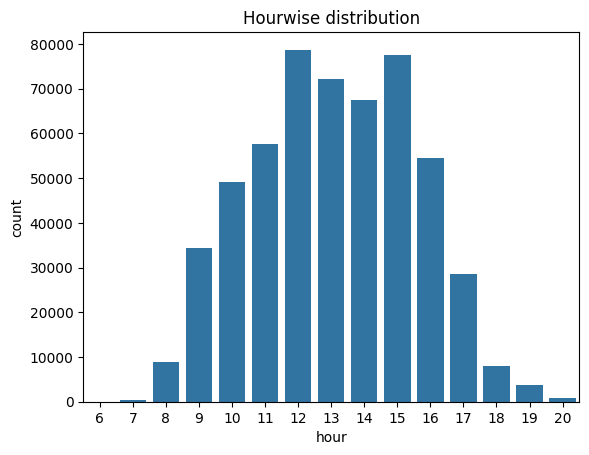

In [55]:
# hourwise distribution
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
hour_df=df['hour'].value_counts().reset_index()
hour_df.columns=['hour','count']
plt.title('Hourwise distribution')
sns.barplot(x='hour',y='count',data=hour_df)

The plot shows that the sales are high between 10 to 5 during the day.

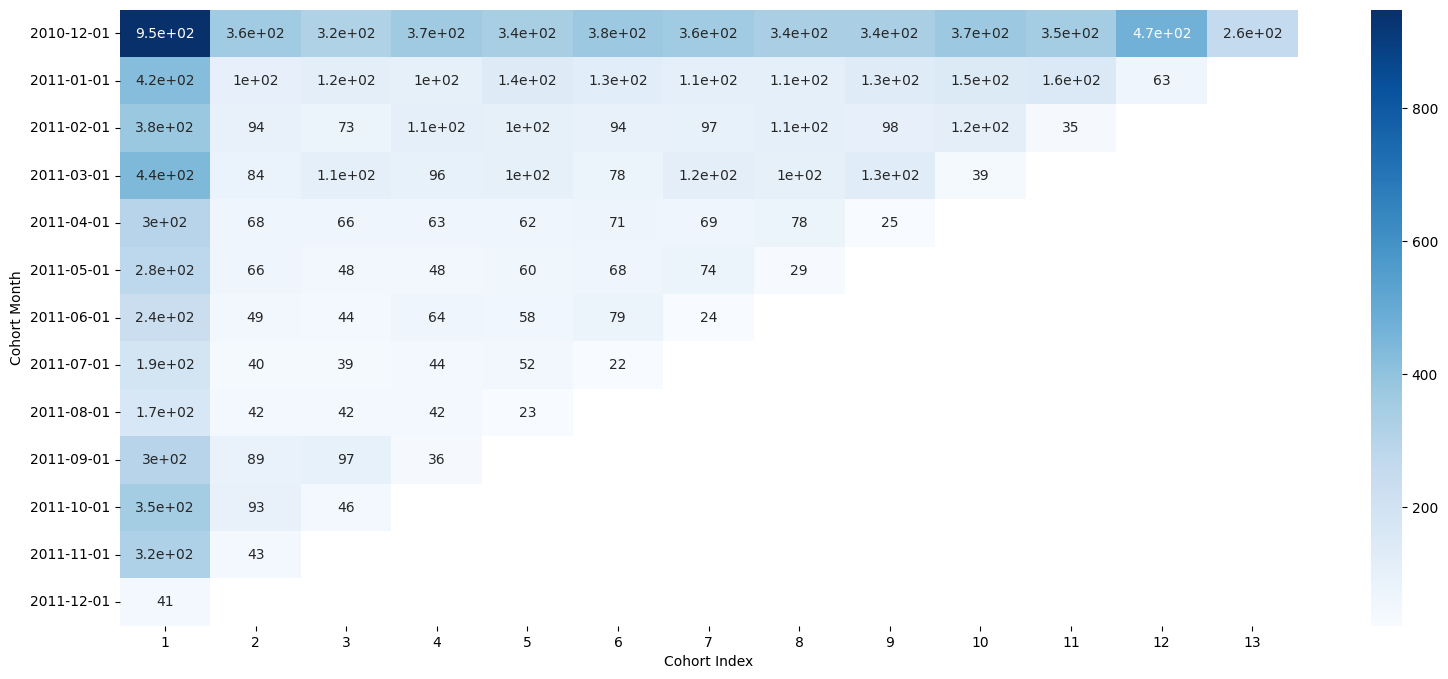

In [56]:
pivot_table = df5.pivot(index='Cohort Month', columns=['Cohort Index'],values='CustomerID')
plt.figure(figsize=(19,8))
sns.heatmap(pivot_table,annot=True,cmap='Blues');

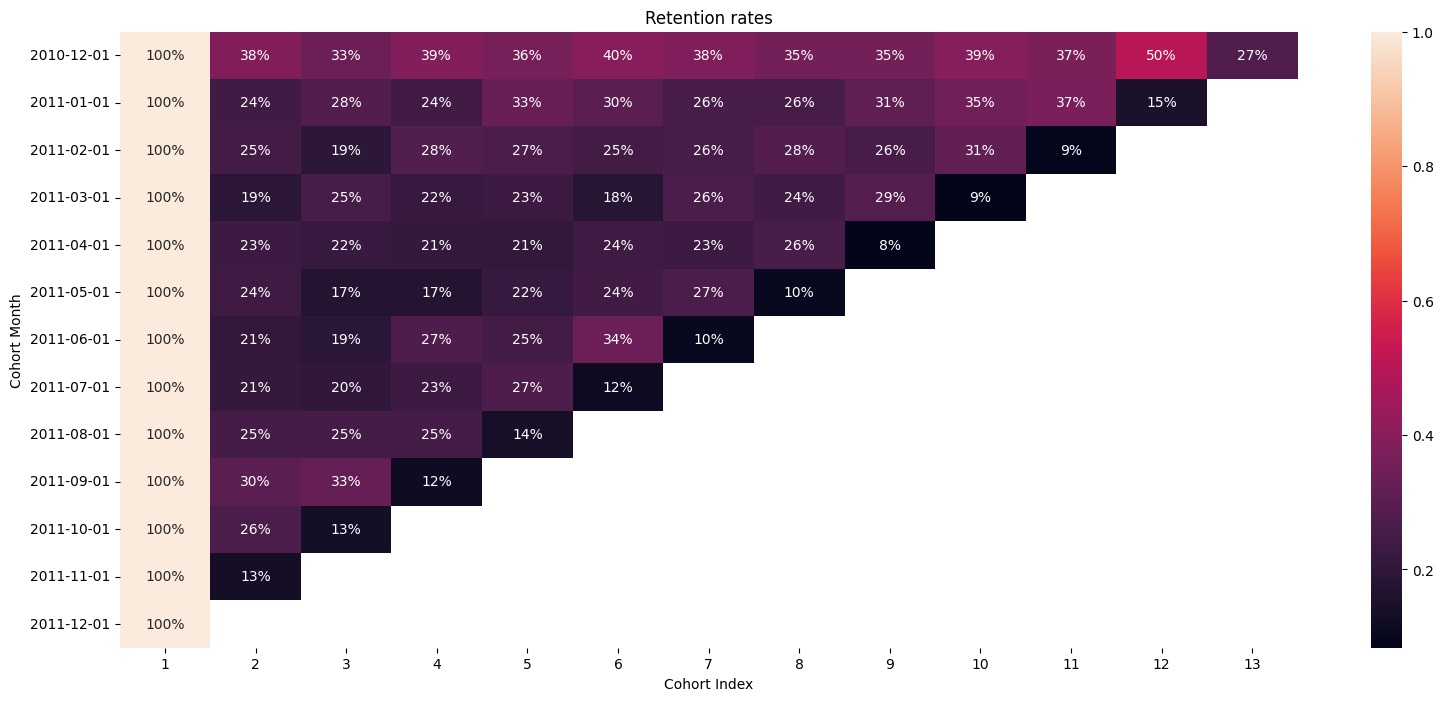

In [57]:

new_cohort_table = pivot_table.divide(pivot_table.iloc[:,0],axis=0)
plt.figure(figsize=(19,8))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%')
plt.title('Retention rates');

# Observations

*   We can see that around 10% retention in customers after a year of use.
*   But we are adding around 250 new customers every month which is a good aspect.



# RFM ANALYSIS

In [58]:
df6=df1.copy()
df6=df6[(df6.UnitPrice*df6.Quantity)>0]
df6.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Recency

In [59]:
# start and end dates
print('Start date: {}'.format(df6.InvoiceDate.min()))
print('End date: {}'.format(df6.InvoiceDate.max()))

Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00


Lets take date 2012-01-01 as the start of new year

In [60]:
day="2012-01-01"
day=pd.to_datetime(day)

In [61]:
recency=df6.groupby(["CustomerID"]).agg({"InvoiceDate":lambda x:((day-x.max()).days)})
recency.head(5)

,InvoiceDate
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332


# Frequency

In [62]:
freq=df6.groupby(["CustomerID"])[["InvoiceNo"]].count()
freq.head(5)

,InvoiceNo
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17


# Monetary

In [63]:
df6["total"]=df6["Quantity"]*df6["UnitPrice"]
money=df6.groupby(["CustomerID"])[["total"]].sum()
money

,total
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [366]:
recency.columns=["Recency"]
freq.columns=["Frequency"]
money.columns=["Monetary"]
RFM = pd.concat([recency,freq,money], axis=1)
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,24,182,4310.00
12348.0,97,31,1797.24
12349.0,40,73,1757.55
12350.0,332,17,334.40
...,...,...,...
18280.0,299,10,180.60
18281.0,202,7,80.82
18282.0,29,12,178.05


# Clustering

<ipython-input-367-a1041f017676>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'],bins=50)
<ipython-input-367-a1041f017676>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'],bins=100)
<ipython-input-367-a1041f017676>:11: 

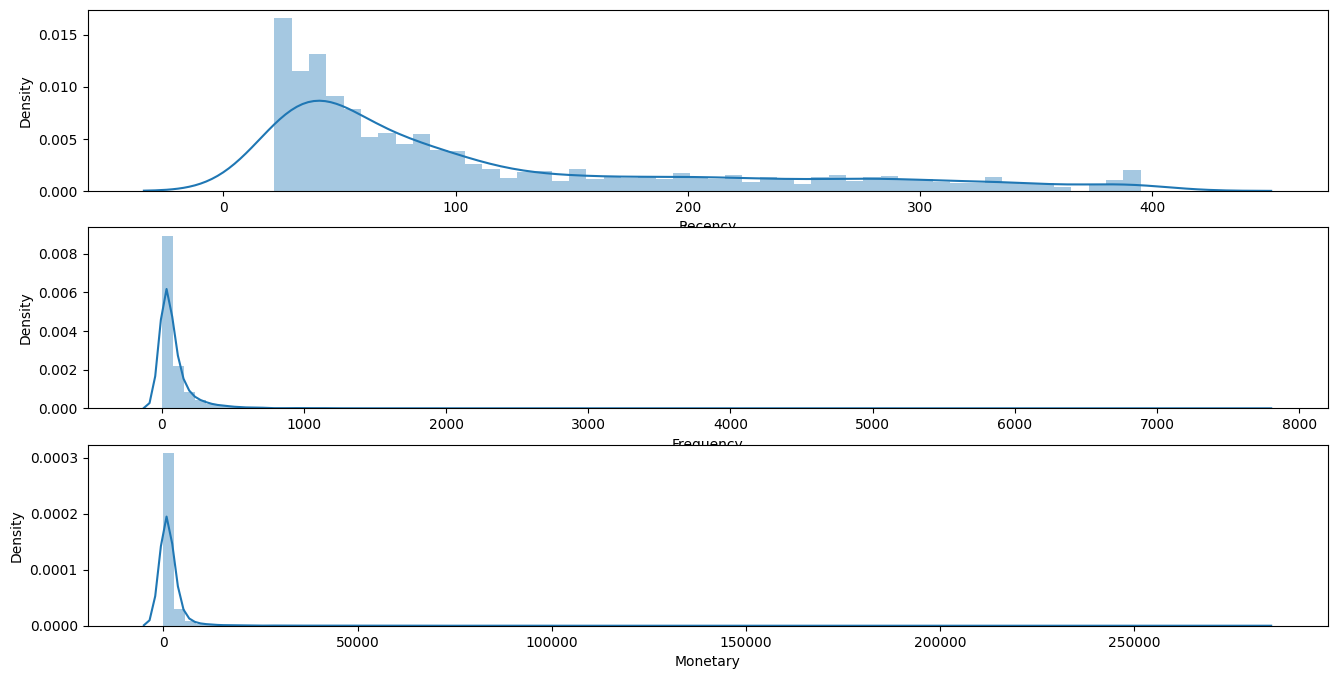

In [367]:
# the distribution of recency, frequency and monetaryvalue variables
plt.figure(figsize=(16,8))

# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'],bins=50)

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'],bins=100)

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(RFM['Monetary'],bins=100)

plt.show()

Plot shows that the data is left skewed

In [368]:
from sklearn.preprocessing import StandardScaler
# Unskew the data
data_log = np.log(RFM)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(data_log)

# Scale and center the data
data_normalized = scaler.transform(data_log)
scaled=data_normalized

# Create a pandas DataFrame
data_norm = pd.DataFrame(data=data_normalized, index=RFM.index, columns=RFM.columns)

<ipython-input-369-eff1762fa933>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])
<ipython-input-369-eff1762fa933>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])
<ipython-input-369-eff1762fa933>:10: UserW

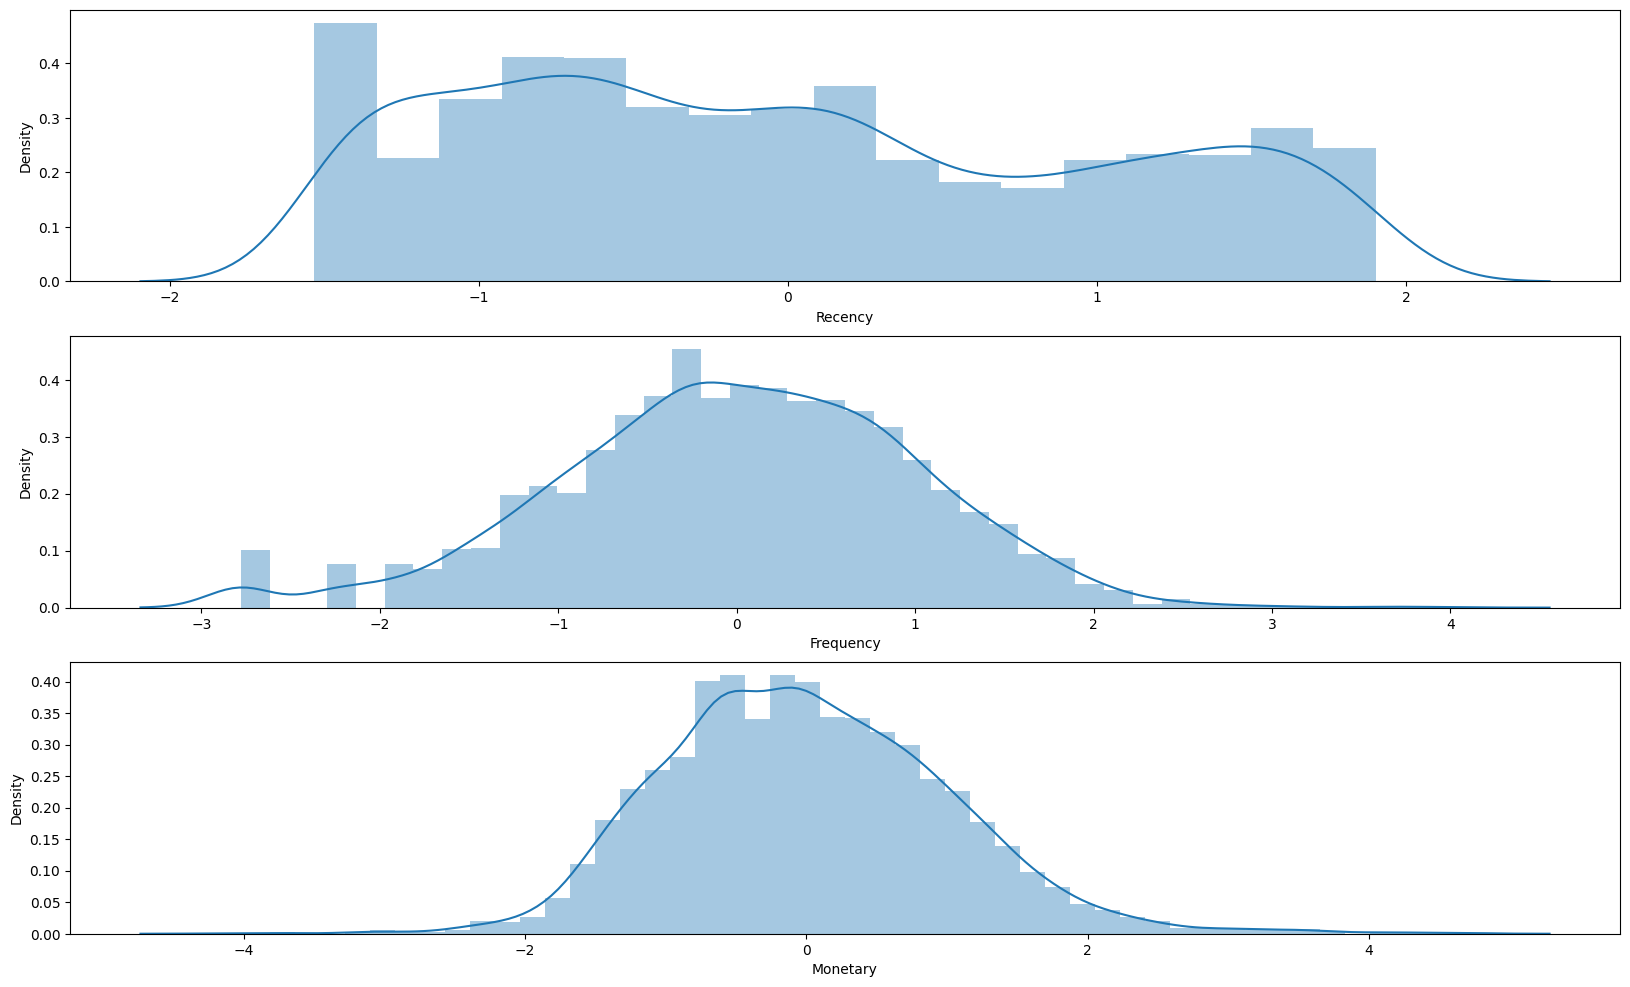

In [369]:
plt.figure(figsize=(20,12))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(data_norm['Monetary'])

# Show the plot
plt.show()

skewness has been removed

# Implimenting K Means

In [370]:
from sklearn.cluster import KMeans

In [371]:
inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i, random_state=25)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

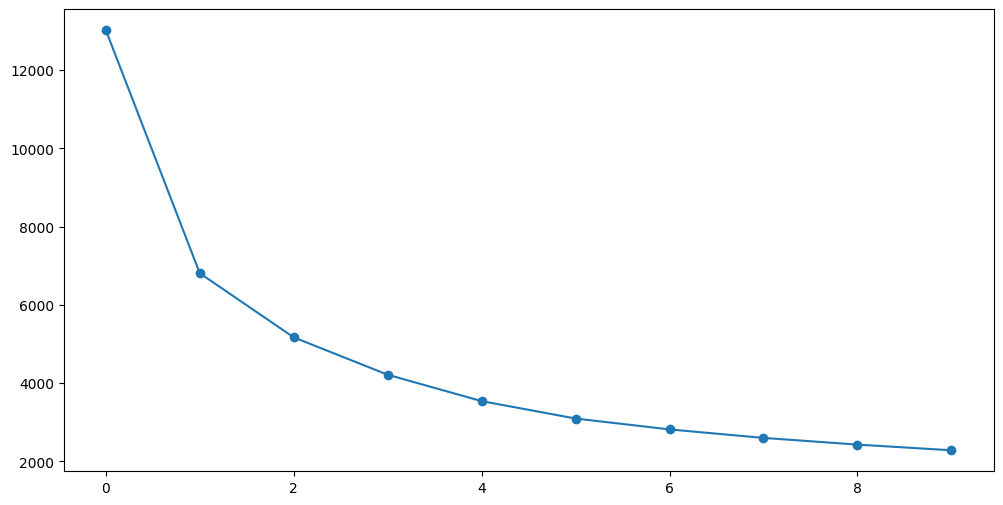

In [372]:
plt.figure(figsize=(12,6))
plt.plot(inertia, marker="o");

In the graph at the point k = 3 elbow is formed so we can say its the best value of k

In [373]:
# we will give form clusters and give each customer labels as per RFM analysis
kmeans=KMeans(n_clusters=3, random_state =25)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [374]:
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,1,77183.60,2
12347.0,24,182,4310.00,1
12348.0,97,31,1797.24,3
12349.0,40,73,1757.55,1
12350.0,332,17,334.40,2
...,...,...,...,...
18280.0,299,10,180.60,2
18281.0,202,7,80.82,2
18282.0,29,12,178.05,3


In [375]:
# sorting the customers into groups
def func(row):
    if row["Clusters"]==1:
        return 'Major Customers'
    elif row["Clusters"]==2:
        return 'At Risk'
    else:
        return 'Average Standing Customers'

In [376]:
RFM['group']=RFM.apply(func, axis=1)
RFM

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12346.0,347,1,77183.60,2,At Risk
12347.0,24,182,4310.00,1,Major Customers
12348.0,97,31,1797.24,3,Average Standing Customers
12349.0,40,73,1757.55,1,Major Customers
12350.0,332,17,334.40,2,At Risk
...,...,...,...,...,...
18280.0,299,10,180.60,2,At Risk
18281.0,202,7,80.82,2,At Risk
18282.0,29,12,178.05,3,Average Standing Customers


In [377]:
result=RFM.group.value_counts()
result

group
Average Standing Customers    1753
Major Customers               1314
At Risk                       1271
Name: count, dtype: int64

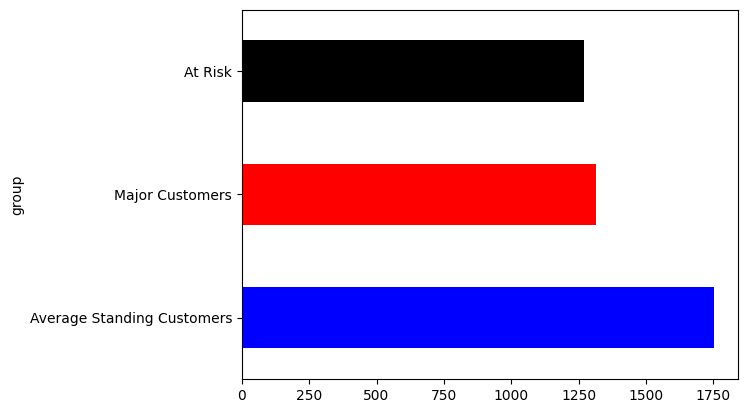

In [378]:
result.plot(kind="barh", color=["Blue","Red","Black"]);

In [379]:
population_avg = RFM[['Recency','Frequency','Monetary']].mean()
population_avg

Recency       114.059474
Frequency      90.523744
Monetary     2048.688081
dtype: float64

In [380]:
cluster_average=RFM.groupby('Clusters')[['Recency','Frequency','Monetary']].mean()
cluster_average

,Recency,Frequency,Monetary
Clusters,,,
1,49.849315,224.142314,5450.624925
2,239.095987,19.138474,411.713430
3,71.532801,42.124358,685.567583


# Conclusion

To have a good understanding about the data, clustering is done and this helps us get to know about the type of customers who have been contributing to the sales.



1.   **Major customers** : These customers have been  transacting more frequently and are contributing to the major profits of the company

2.   **Average customers** : This type of customers are less frequent contributors, but can be converted to major customers by providng discounts and best possible service.

3.   **Risky customers** : There transactions are very rare and can be told that they are not customers anymore. But to regain these customers back some sales and discounts could help.


